In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
from numpy import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy
import scipy.optimize
from scipy.optimize import fsolve


%matplotlib notebook
plt.rcParams['figure.figsize'] = [10,4]
plt.rcParams['figure.dpi'] = 100

atm=1.01325E5
torr=atm/760.0
R=8.3145
g=9.807
NA=6.022e23
def tok(x): return x+273.15



RT=2.5 #kJ/mol
#def slog(x): return log(x) if x>0 else 0   #DOES NOT WORK
def pB(xB,chi=0,pBs=10): return xB*exp(chi*(1-xB)**2)*pBs
def pA(xB,chi=0,pAs=20): return (1-xB)*exp(chi*xB**2)*pAs
def DF(xB,chi=0): return RT*(chi*xB*(1-xB)+xB*log(xB)+(1-xB)*log(1-xB))
def DU(xB,chi=0): return RT*(chi*xB*(1-xB))
def TDS(xB,chi=0): return RT*(xB*log(xB)+(1-xB)*log(1-xB))  #-TDS
    
xB=linspace(0.001,0.999)

<IPython.core.display.Javascript object>


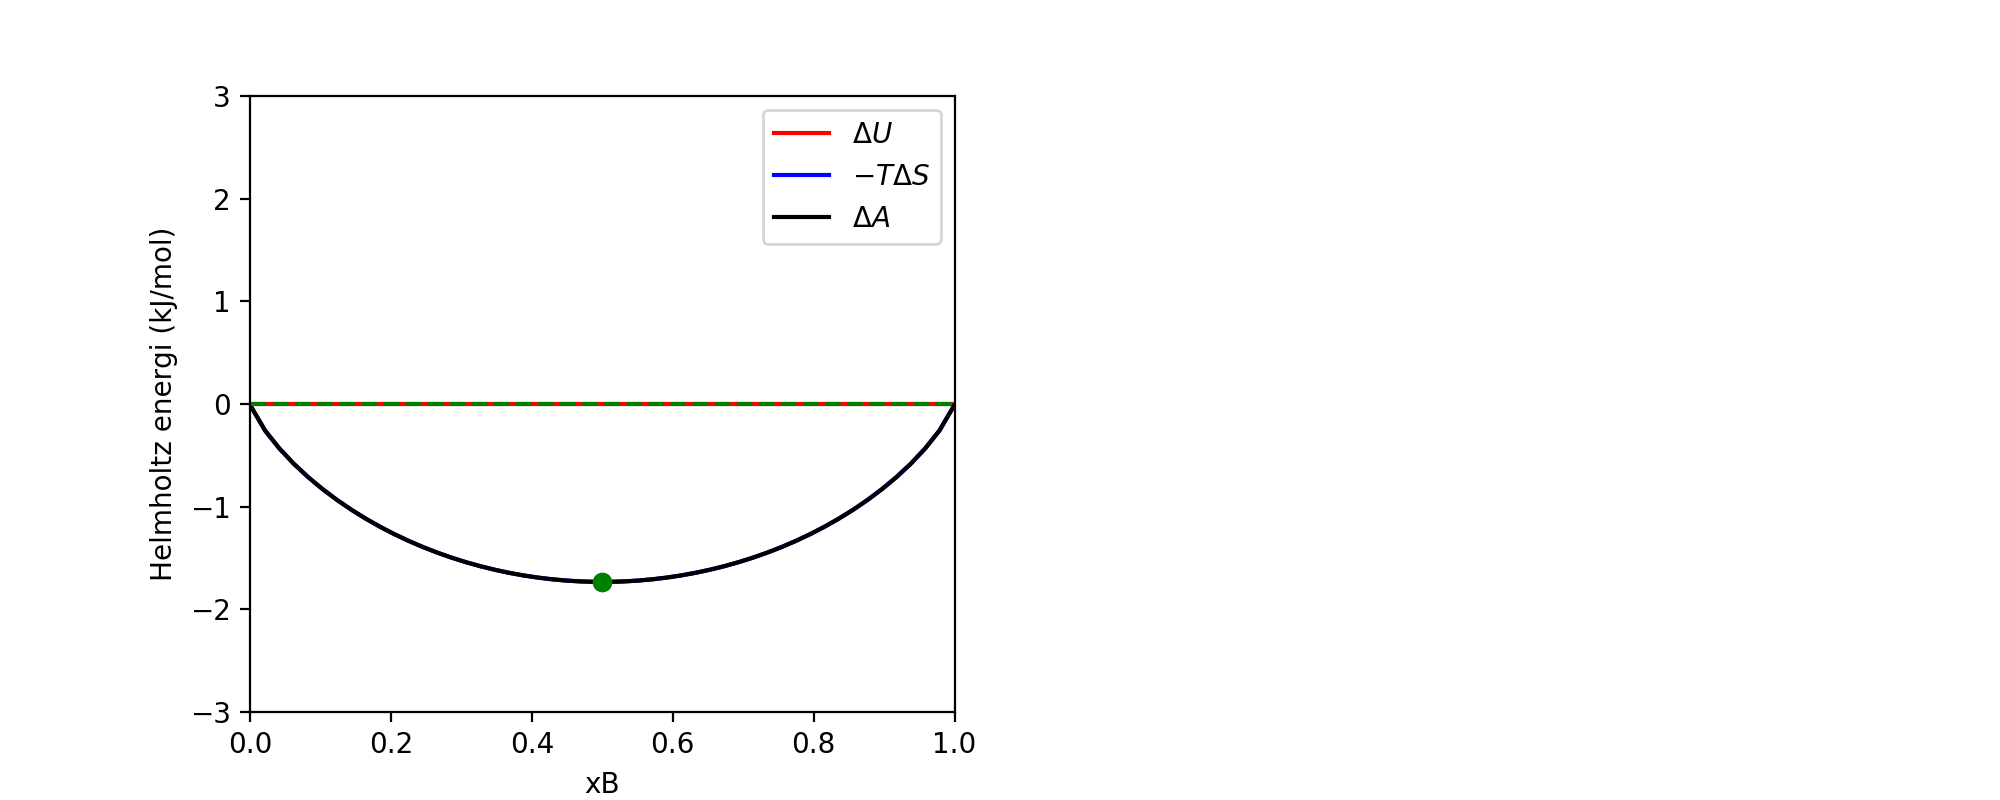

interactive(children=(FloatSlider(value=0.0, description='chi', max=4.0, min=-2.0, step=0.01), Output()), _dom…

<function __main__.update(chi)>

In [18]:
fig = plt.figure()
subfig=fig.add_subplot(121)
plt.xlabel('xB')
plt.ylabel('Helmholtz energi (kJ/mol)')
plt.ylim(-3,3)
plt.xlim(0,1)

lineDU,=subfig.plot(xB,DU(xB),'r-', label=r'$\Delta U$')
lineTDS,=subfig.plot(xB,TDS(xB),'b-',label=r'$-T\Delta S$')
lineDF,=subfig.plot(xB,DF(xB),'k-',label=r'$\Delta A$')
dot1,=subfig.plot(0.5,DF(0.5),'go')
dot2,=subfig.plot(0.5,DF(0.5),'go')

subfig.plot(xB,0*xB,'g--')
plt.legend()

def update(chi):
    lineDF.set_ydata(DF(xB,chi))
    lineTDS.set_ydata(TDS(xB,chi))
    lineDU.set_ydata(DU(xB,chi))
    fig.canvas.draw_idle()
    if(chi>2):
        x1,=fsolve(lambda x: log(x/(1-x))+chi*(1-2*x), 0.01)
        x2=1-x1
    else:
        x1=x2=0.5
    dot1.set_xdata([x1])
    dot2.set_xdata([x2])
    dot1.set_ydata([DF(x1,chi)])
    dot2.set_ydata([DF(x2,chi)])

    
widgets.interact(update, chi = widgets.FloatSlider(value=0,
                                               min=-2.0,
                                               max=4.0,
                                               step=0.01))


<IPython.core.display.Javascript object>


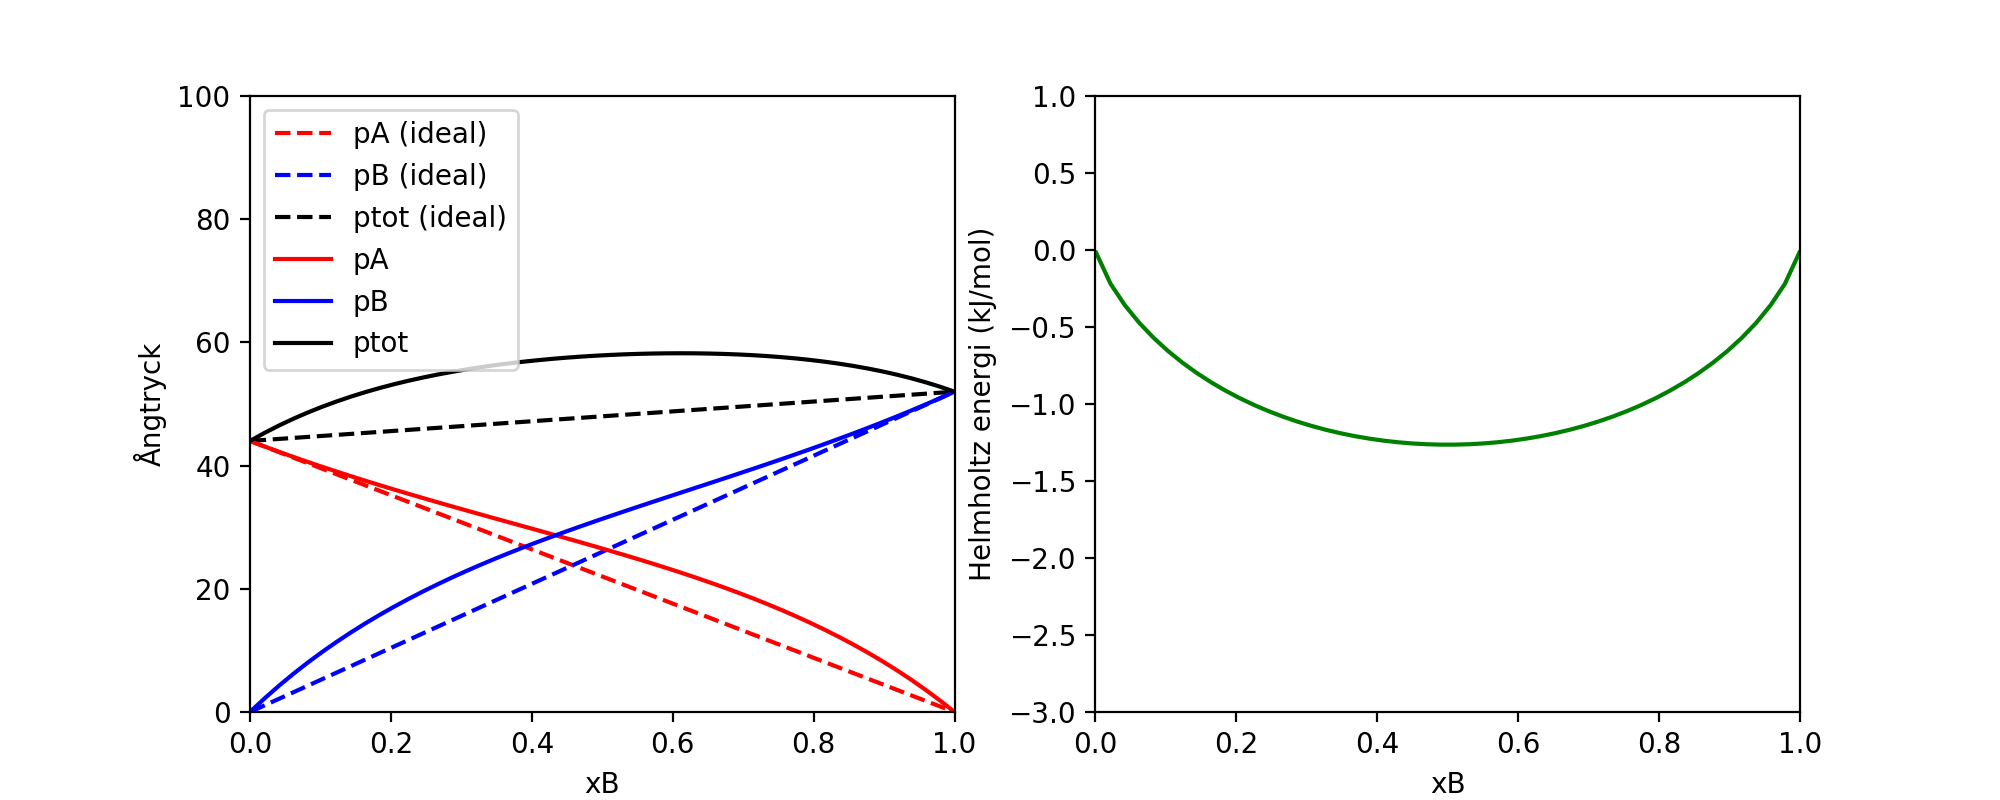

interactive(children=(FloatSlider(value=0.0, description='chi', max=4.0, min=-2.0, step=0.25), FloatSlider(val…

<function __main__.update(chi, pAs, pBs)>

In [19]:
fig = plt.figure()
subfig=fig.add_subplot(121)
plt.xlabel('xB')
plt.ylabel('Ångtryck')
plt.ylim(0,100)
plt.xlim(0,1)
lineAi,=subfig.plot(xB,pA(xB),'r--', label="pA (ideal)")
lineBi,=subfig.plot(xB,pB(xB),'b--',label="pB (ideal)")
lineTi,=subfig.plot(xB,pA(xB)+pB(xB),'k--',label="ptot (ideal)")
lineA,=subfig.plot(xB,pA(xB),'r-', label="pA")
lineB,=subfig.plot(xB,pB(xB),'b-', label="pB")
lineT,=subfig.plot(xB,pB(xB)+pA(xB),'k-', label="ptot")
plt.legend()

subfig2=fig.add_subplot(122)
plt.xlabel('xB')
plt.ylabel('Helmholtz energi (kJ/mol)')
plt.ylim(-3,1)
plt.xlim(0,1)
lineDF,=subfig2.plot(xB,DF(xB),'g-')



def update(chi,pAs,pBs):
    lineAi.set_ydata(pA(xB,0,pAs))
    lineBi.set_ydata(pB(xB,0,pBs))
    lineTi.set_ydata(pA(xB,0,pAs)+pB(xB,0,pBs))
    lineA.set_ydata(pA(xB,chi,pAs))
    lineB.set_ydata(pB(xB,chi,pBs))
    lineT.set_ydata(pA(xB,chi,pAs)+pB(xB,chi,pBs))
    lineDF.set_ydata(DF(xB,chi))
    fig.canvas.draw_idle()

widgets.interact(update, chi = widgets.FloatSlider(value=0,
                                               min=-2.0,
                                               max=4.0,
                                               step=0.25),
                pAs = widgets.FloatSlider(value=20,
                                               min=0,
                                               max=100,
                                               step=1),
                pBs = widgets.FloatSlider(value=10,
                                               min=0,
                                               max=100,
                                               step=1))

<IPython.core.display.Javascript object>


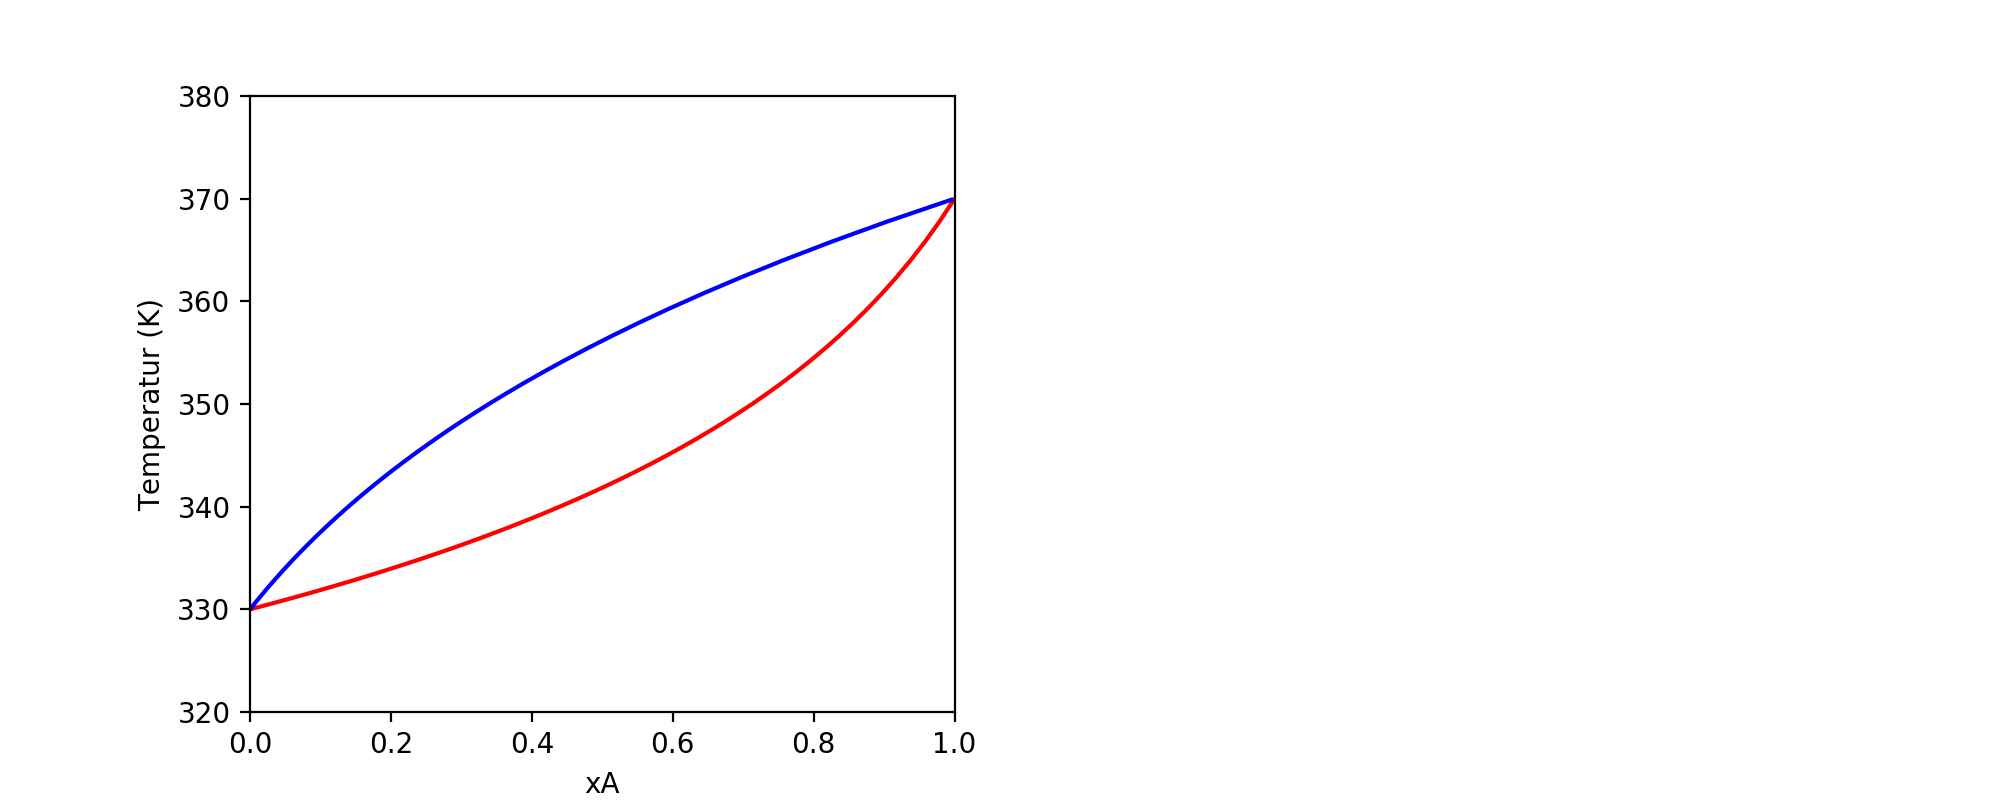

interactive(children=(FloatSlider(value=0.0, description='chi', max=2.0, min=-2.0), FloatSlider(value=370.0, d…

In [15]:
TA = tok(100)
TB = tok(82.4)
HA = 40.66e3
HB = 39.07e3

def pAs(T): return atm*exp(HA/R*(1/TA-1/T))
def pBs(T): return atm*exp(HB/R*(1/TB-1/T))
def pA(T,xA,chi): return xA*exp(chi*(1-xA)**2)*pAs(T)
def pB(T,xA,chi): return (1-xA)*exp(chi*xA**2)*pBs(T)
def ptot(T,xA,chi): return pA(T,xA,chi)+pB(T,xA,chi)

x=linspace(0.001,0.999)


zwtest=0
Tblist=[]
yAlist=[]

for xA in x:
    Tb,=fsolve(lambda T: ptot(T,xA,zwtest)-atm, TA)
    yA=pA(Tb,xA,zwtest)/ptot(Tb,xA,zwtest)
    Tblist.append(Tb)
    yAlist.append(yA)
               
fig = plt.figure()
subfig=fig.add_subplot(121)
lineBP,=subfig.plot(x,Tblist,'r-')
lineCP,=subfig.plot(yAlist,Tblist,'b-')
plt.xlabel('xA')
plt.ylabel('Temperatur (K)')
plt.ylim(320,380)
plt.xlim(0,1)

def update(chi,TA,TB,HA,HB):
    def pAs(T): return atm*exp(HA*1e3/R*(1/TA-1/T))
    def pBs(T): return atm*exp(HB*1e3/R*(1/TB-1/T))
    def pA(T,xA): return xA*exp(chi*(1-xA)**2)*pAs(T)
    def pB(T,xA): return (1-xA)*exp(chi*xA**2)*pBs(T)
    def ptot(T,xA): return pA(T,xA)+pB(T,xA)

    Tblist=[]
    yAlist=[]
    for xA in x:
        Tb,=fsolve(lambda T: ptot(T,xA)-atm, TA)
        yA=pA(Tb,xA)/ptot(Tb,xA)
        Tblist.append(Tb)
        yAlist.append(yA)
    lineBP.set_ydata(array(Tblist))
    lineCP.set_ydata(Tblist)
    lineCP.set_xdata(yAlist)
    fig.canvas.draw_idle()

widgets.interact(update, chi = widgets.FloatSlider(value=0,
                                               min=-2.0,
                                               max=2.0,
                                               step=0.1),
                TA = widgets.FloatSlider(value=370,
                                               min=330,
                                               max=370,
                                               step=1),
                TB = widgets.FloatSlider(value=330,
                                               min=330,
                                               max=370,
                                               step=1),
                HA = widgets.FloatSlider(value=40,
                                               min=20,
                                               max=60,
                                               step=1),
                HB = widgets.FloatSlider(value=40,
                                               min=20,
                                               max=60,
                                               step=1));



